# Avaliando modelos de Machine Learning

O dataset analisado contém dados sobre alunos, tanto variáveis categóricas, como numéricas, de acordo com as descrições abaixo: 

Atributos do dataset:

- sex: sexo
- age: idade
- famsize: tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário
- Pstatus: status de habitação com os pais; T - mora junto com os pais, A - mora separado;
- traveltime: tempo de viagem entre escola e casa (1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora)
- studytime: tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas
- schoolsup: suporte educacional extra escola
- famsup: suporte educacional da família
- paid: pagou aulas particulares por fora 
- activities: atividades extra-curriculares
- internet: acesso a internet em casa
- romantic: se está num relacionamento
- famrel: qualidade das relações familiares; 1 - muito ruim a 5 - muito boa
- freetime: tempo livre após escola; 1 - muito pouco até 5 - muito
- goout: relaciona-se com amigos; 1 - muito pouco até 5 - muito
- absences: quantidade de faltas na escola
- G3: nota média final no ensino médio

O objetivo deste script foi realizar uma __EDA__ geral, bem como __pré-processamentos__ nas variáveis. Após, considerada a variável __'G3'__ como a __variável target__ do problema - em um contexto de __regressão.__
Então, foram realizados testes com __diferentes modelos de regressão__ a fim de explicar a variável target. A metodologia aplicada para avaliação dos modelos foi de __validação cruzada__ e o __coeficiente de determinação ($R^{2}$)__ como métrica de performance e gráficos para visualização do comportamento do modelo.

Importação das bibliotecas e a criação do dataframe:

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("dataframe_exercicio_modulo_9.csv")
print(df.shape)
df.head()

(1044, 17)


,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10


# Exploratory Data Analysis

Apresentação de estatísticas descritivas com a função describe():

In [73]:
df.describe()

,age,traveltime,studytime,famrel,freetime,goout,absences,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,1.522989,1.970307,3.935824,3.201149,3.156130,4.434866,11.341954
std,1.239975,0.731727,0.834353,0.933401,1.031507,1.152575,6.210017,3.864796
min,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,4.000000,3.000000,2.000000,0.000000,10.000000
50%,17.000000,1.000000,2.000000,4.000000,3.000000,3.000000,2.000000,11.000000
75%,18.000000,2.000000,2.000000,5.000000,4.000000,4.000000,6.000000,14.000000
max,22.000000,4.000000,4.000000,5.000000,5.000000,5.000000,75.000000,20.000000


Apresentação da correlação de Pearson entre as variáveis numéricas com a função corr():

In [74]:
df.corr()

,age,traveltime,studytime,famrel,freetime,goout,absences,G3
age,1.000000,0.049216,-0.007870,0.007162,0.002645,0.118510,0.153196,-0.125282
traveltime,0.049216,1.000000,-0.081328,-0.012578,-0.007403,0.049740,-0.022669,-0.102627
studytime,-0.007870,-0.081328,1.000000,0.012324,-0.094429,-0.072941,-0.075594,0.161629
famrel,0.007162,-0.012578,0.012324,1.000000,0.136901,0.080619,-0.062171,0.054461
freetime,0.002645,-0.007403,-0.094429,0.136901,1.000000,0.323556,-0.032079,-0.064890
goout,0.118510,0.049740,-0.072941,0.080619,0.323556,1.000000,0.056142,-0.097877
absences,0.153196,-0.022669,-0.075594,-0.062171,-0.032079,0.056142,1.000000,-0.045671
G3,-0.125282,-0.102627,0.161629,0.054461,-0.064890,-0.097877,-0.045671,1.000000


__Mapeamento de variáveis e possíveis análises de relação__

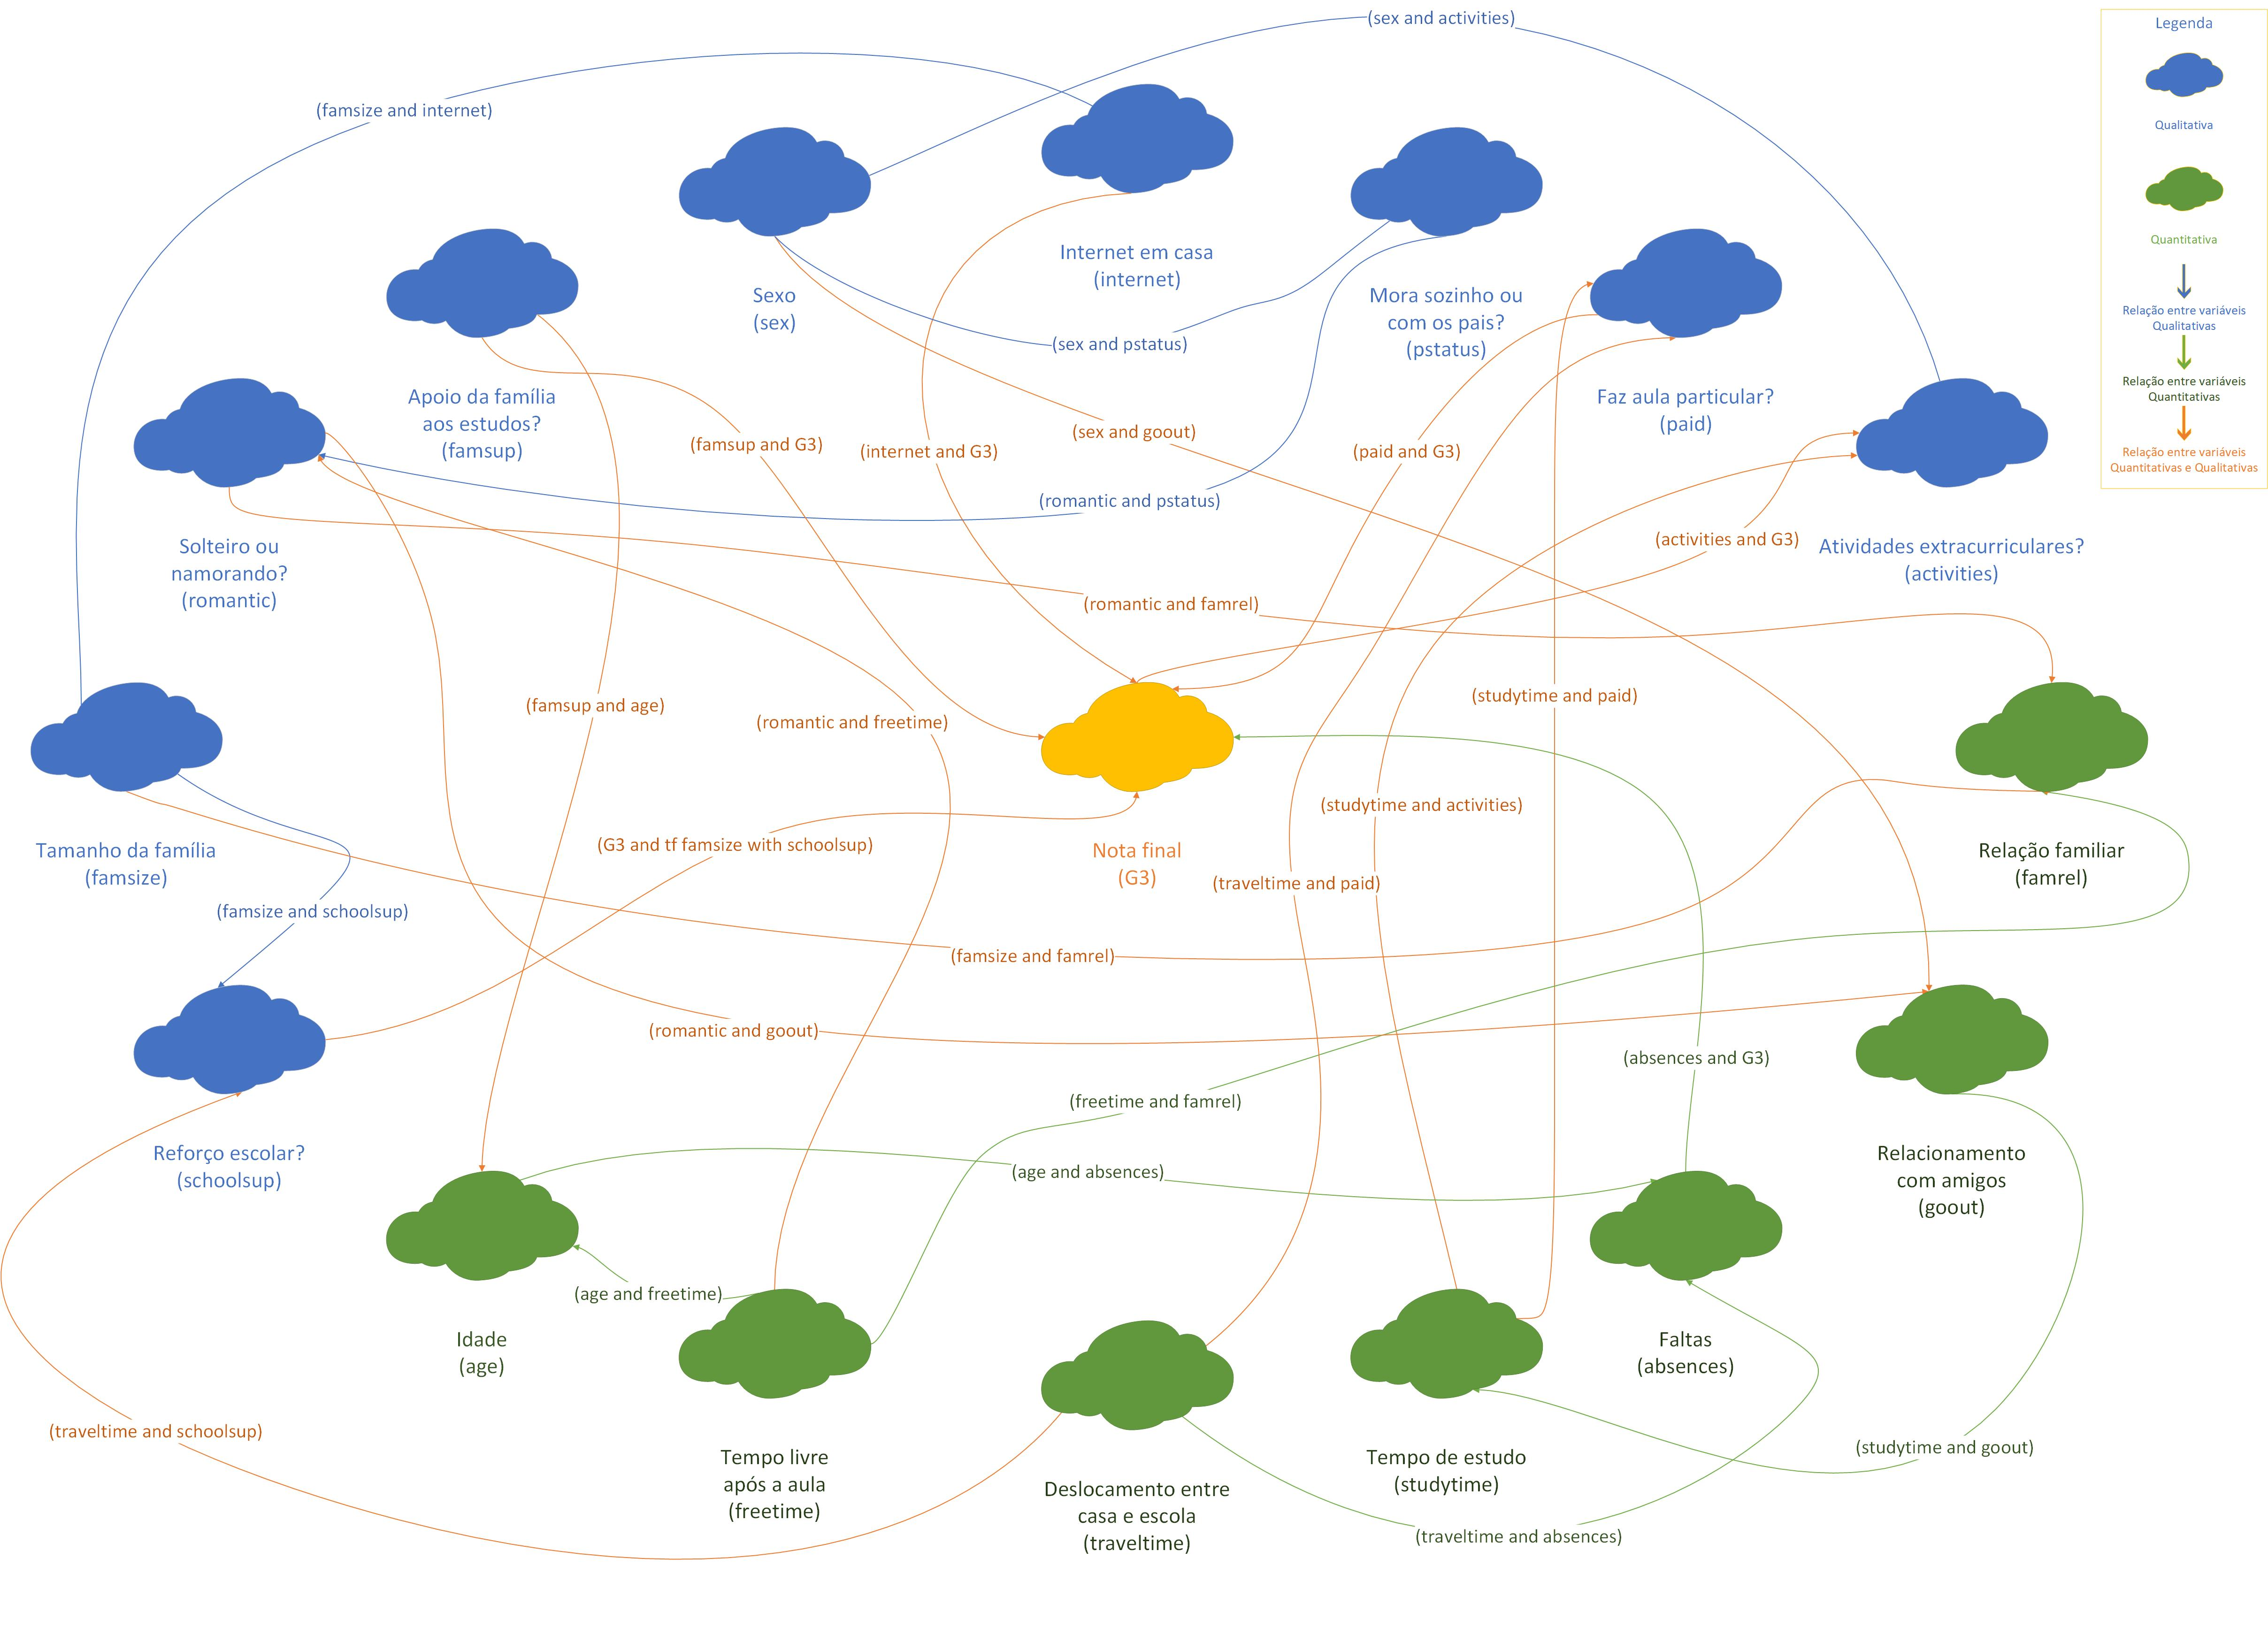

In [75]:
from IPython import display
display.Image("./cnv.jpg")

__Análise de relação de variáveis numéricas__

Relação entre G3 e studytime:

Na análise do gráfico abaixo, indica-se que não há relação entre a nota final e o tempo de estudo, visto que independente da variação de tempo de estudo, a distribuição da nota final tem pouca variação entre os tempos.

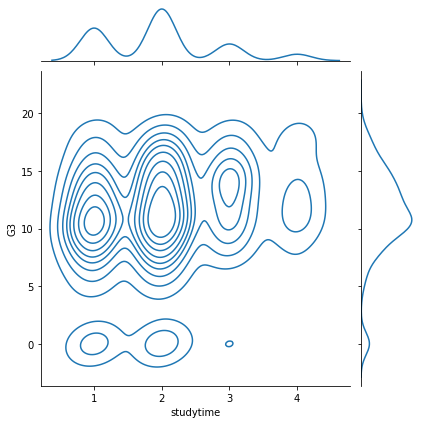

In [76]:
sns.jointplot(x=df.studytime, y=df.G3, kind="kde")
plt.show()

Relação entre G3 e age:

Na análise do gráfico abaixo, indica-se que não há relação entre a nota final e a idade, visto que independente da variação da idade, a distribuição da nota final tem pouca variação entre as idades.

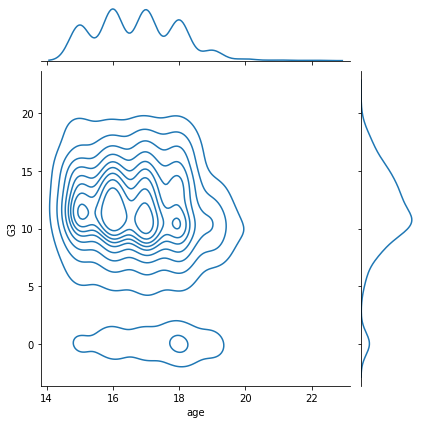

In [77]:
sns.jointplot(x=df.age, y=df.G3, kind="kde")
plt.show()

Relação entre famrel, famsize e freetime:

Na análise do gráfico abaixo, indica-se que não há relação entre o tempo livre e a relação familiar, visto que quanto melhor a relação familiar, maior o tempo livre do aluno. Também, apresenta-se que famílias que possuem mais do que 3 integrantes (GT3) possuem menores níveis de relação familiar do que as famílias com no máximo 3 integrantes (LT3).

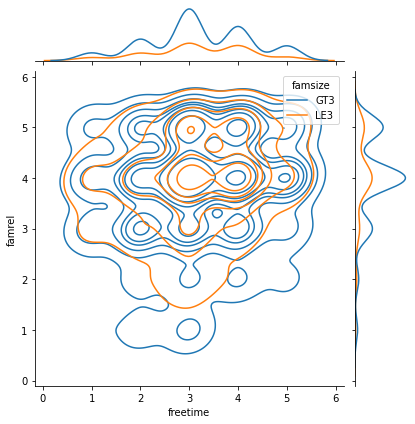

In [78]:
sns.jointplot(x=df.freetime, y=df.famrel, hue=df.famsize, kind="kde")
plt.show()

Relação entre studytime e goout:

Na análise do gráfico abaixo, indica-se que há certa correlação entre o tempo de estudo e o tempo que os alunos saem. Visto que passando de duas horas de estudo, a quantidade de tempo fora se reduz entre 3 ou 2 horas.

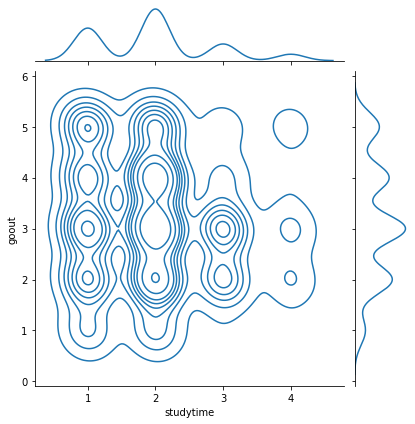

In [79]:
sns.jointplot(x=df.studytime, y=df.goout, kind="kde")
plt.show()

Relação entre age e freetime:

Na análise do gráfico abaixo, não se indica-se que há correlação entre a ideade e o tempo livre, a variação dos tempos livre se mantém aentre as idades, com maior concentração entre 2 até 4 horas disponíveis.

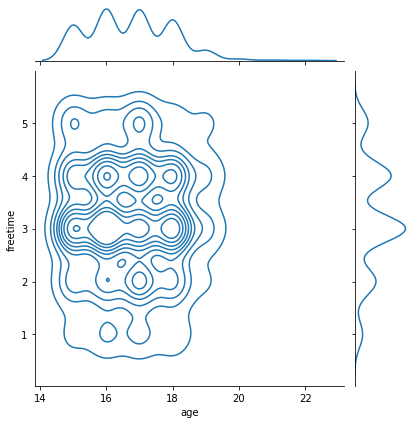

In [80]:
sns.jointplot(x=df.age, y=df.freetime, kind="kde")
plt.show()

Relação entre age e absences:

Na análise do gráfico abaixo, não há grande relação entre variáveis, embora haja grande concentração das idades entre 14 e 18 anos, boa parte está centralizado entre 0 e 10 faltas.

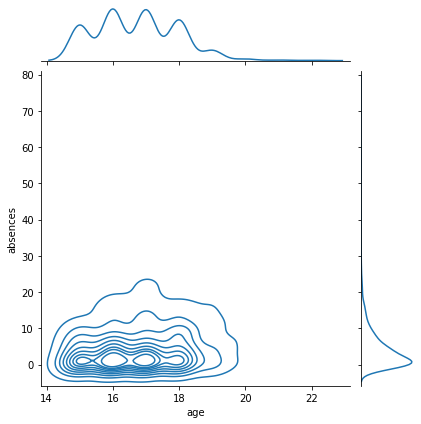

In [81]:
sns.jointplot(x=df.age, y=df.absences, kind="kde")
plt.show()

Relação entre G3 e absences:

Na análise do gráfico abaixo, não há grande relação entre variáveis, embora haja grande concentração da nota final entre 10 e 15, boa parte está centralizado entre 0 e 10 faltas.

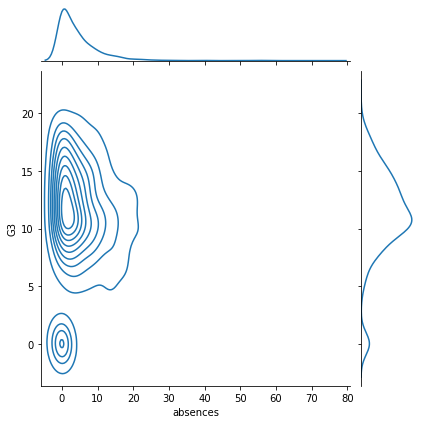

In [82]:
sns.jointplot(x=df.absences, y=df.G3, kind="kde")
plt.show()

Relação entre traveltime e absences:

Na análise do gráfico abaixo, naõ indica correlação, visto que conforme o tempo de viagem é maior, não há variação proporcional no indice de faltas.

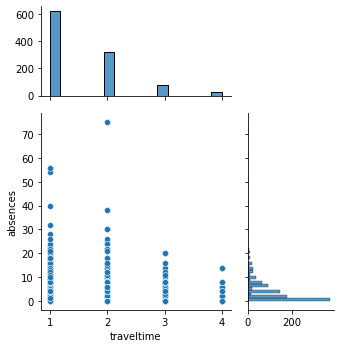

In [83]:
sns.jointplot(x=df.traveltime, y=df.absences, height=5, ratio=2, marginal_ticks=True)
plt.show()

Relação entre traveltime e schoolsup:

Na análise do gráfico abaixo, a variável traveltime não é influenciada pela variação de schoolsup, visto que os boxplots estão idênticose a média está próxima.

<AxesSubplot:xlabel='traveltime', ylabel='schoolsup'>

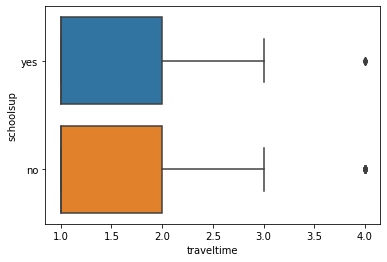

In [84]:
sns.boxplot(x=df.traveltime, y=df.schoolsup)

In [85]:
df.groupby(by = "schoolsup").apply(lambda x: x.traveltime.mean())

schoolsup
no     1.531892
yes    1.453782
dtype: float64

Relação entre goout e romantic:

Na análise do gráfico abaixo, a variável goout não é influenciada pela variação de romantic, visto que os boxplots estão idênticose a média está próxima.

<AxesSubplot:xlabel='goout', ylabel='romantic'>

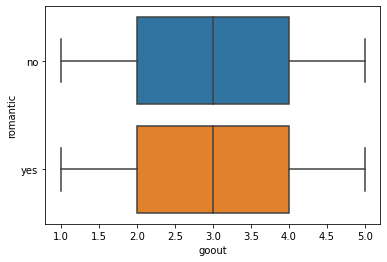

In [86]:
sns.boxplot(x=df.goout, y=df.romantic)

In [87]:
df.groupby(by = "romantic").apply(lambda x: x.goout.mean())

romantic
no     3.153046
yes    3.161725
dtype: float64

Relação entre famrel e famsize:

Na análise do gráfico abaixo, a variável famrel não é influenciada pela variação de famsize, visto que os boxplots estão idênticos e a média está idêntica.

<AxesSubplot:xlabel='famrel', ylabel='famsize'>

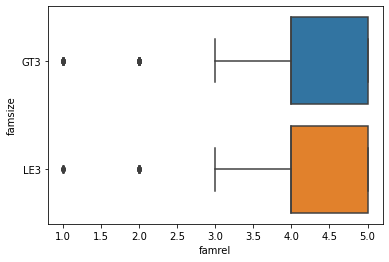

In [88]:
sns.boxplot(x=df.famrel, y=df.famsize)

In [120]:
df.groupby(by = "famsize").apply(lambda x: x.famrel.mean())

famsize
GT3    3.939024
LE3    3.928105
dtype: float64

Realçaõ entre traveltime e paid:

Na análise do gráfico abaixo, a variável traveltime não é influenciada pela variação de paid, visto que os boxplots estão idênticos e a média está próxima.

<AxesSubplot:xlabel='traveltime', ylabel='paid'>

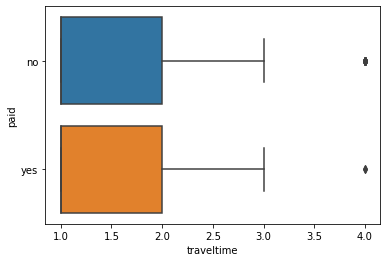

In [90]:
sns.boxplot(x=df.traveltime, y=df.paid)

In [91]:
df.groupby(by = "paid").apply(lambda x: x.traveltime.mean())

paid
no     1.554612
yes    1.404545
dtype: float64

Relação entre studytime e activities:

Na análise do gráfico abaixo, a variável studytime não é influenciada pela variação de activities, visto que os boxplots estão idênticos e a média está próxima.

<AxesSubplot:xlabel='studytime', ylabel='activities'>

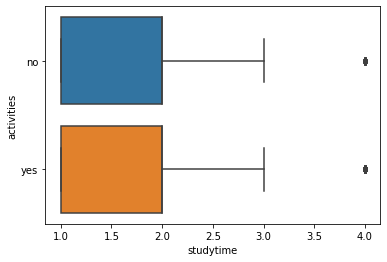

In [92]:
sns.boxplot(x=df.studytime, y=df.activities)

In [93]:
df.groupby(by = "activities").apply(lambda x: x.studytime.mean())

activities
no     1.905303
yes    2.036822
dtype: float64

Relação entre freetime e romantic:

Na análise do gráfico abaixo, a variável freetime não é influenciada pela variação de romantic, visto que os boxplots estão idênticos e a média está próxima.

<AxesSubplot:xlabel='freetime', ylabel='romantic'>

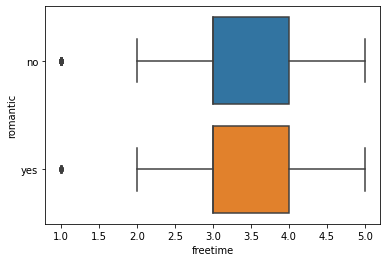

In [94]:
sns.boxplot(x=df.freetime, y=df.romantic)

In [95]:
df.groupby(by = "romantic").apply(lambda x: x.freetime.mean())

romantic
no     3.191679
yes    3.218329
dtype: float64

Relação entre G3 e famsup:

Na análise do gráfico abaixo, a variável G3 não é influenciada pela variação de famsup, visto que os boxplots estão idênticos e a média está próxima.

<AxesSubplot:xlabel='G3', ylabel='famsup'>

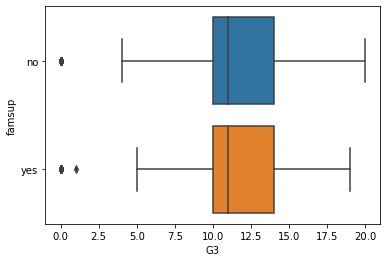

In [96]:
sns.boxplot(x=df.G3, y=df.famsup)

In [97]:
df.groupby(by = "famsup").apply(lambda x: x.G3.mean())

famsup
no     11.277228
yes    11.382812
dtype: float64

Relação entre G3 e activities:

Na análise do gráfico abaixo, a variável G3 não é influenciada pela variação de activities, visto que os boxplots estão idênticos e a média está próxima.

<AxesSubplot:xlabel='G3', ylabel='activities'>

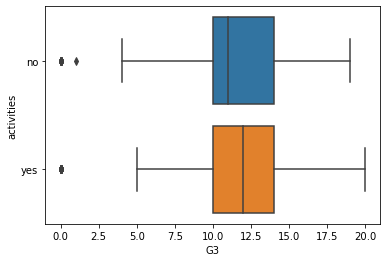

In [98]:
sns.boxplot(x=df.G3, y=df.activities)

In [99]:
df.groupby(by = "activities").apply(lambda x: x.G3.mean())

activities
no     11.212121
yes    11.474806
dtype: float64

Relação entre G3 e paid:

Na análise do gráfico abaixo, a variável G3 tem pequena influência pela variação de paid, visto que os boxplots possuem certa diferença e a média tem variação.

<AxesSubplot:xlabel='G3', ylabel='paid'>

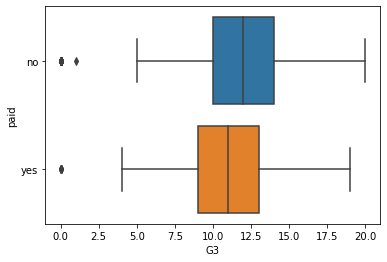

In [100]:
sns.boxplot(x=df.G3, y=df.paid)

In [101]:
df.groupby(by = "paid").apply(lambda x: x.G3.mean())

paid
no     11.440534
yes    10.972727
dtype: float64

Relação entre internet e G3:

Na análise do gráfico abaixo, a variável G3 tem pequena influência pela variação de internet, visto que os boxplots possuem certa diferença e a média tem variação.

<AxesSubplot:xlabel='G3', ylabel='internet'>

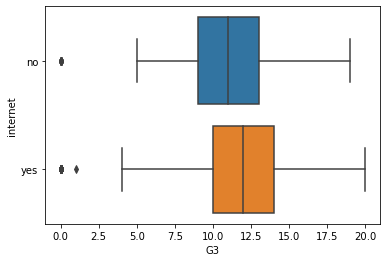

In [102]:
sns.boxplot(x=df.G3, y=df.internet)

In [103]:
df.groupby(by = "internet").apply(lambda x: x.G3.mean())

internet
no     10.534562
yes    11.553809
dtype: float64

# Pré-processamento

Criação da função para pré-processamento:

In [105]:
def preprocessamento_completo(df, dataset_de_treino = True, cat_encoder = None, std_scaler = None):

    dff = df.copy()
        
    dff = dff.dropna(axis = 0)
    
    variaveis_para_normalizar = ['famrel',
                                 'goout',
                                 'absences',
                                 'studytime',
                                 'traveltime',
                                 'freetime',
                                 'age']
    variavel_ohe = ['sex',
                    'famsize',
                    'Pstatus',
                    'schoolsup',
                    'famsup',
                    'paid',
                    'activities',
                    'internet',
                    'romantic']

    if dataset_de_treino:  
        
        #OHE
        encoder = OneHotEncoder()
       
        df_OHE = encoder.fit_transform(dff[variavel_ohe]).toarray()
        
        #normalização
        sc = StandardScaler()
        variaveis_norm = sc.fit_transform(df[variaveis_para_normalizar])
        
        X, y =  np.c_[df_OHE, variaveis_norm], dff.G3.values
        return X, y, encoder, sc
    
    else:
        #OHE
        df_OHE = cat_encoder.transform(dff[variavel_ohe]).toarray()
        
        #normalização
        variaveis_norm = std_scaler.transform(dff[variaveis_para_normalizar]) 
        
        X, y =  np.c_[df_OHE, variaveis_norm], dff.G3.values
        return X, y

Aplicação da função para pré-processamento para treino:

In [106]:
Xtrain, ytrain, encoder_train, scaler_train  = preprocessamento_completo(df = dftrain, 
                                                                         dataset_de_treino = True, 
                                                                         cat_encoder = None, 
                                                                         std_scaler = None)

Aplicação da função para pré-processamento para teste:

In [108]:
Xtest, ytest = preprocessamento_completo(df = dftest, 
                                         dataset_de_treino = False, 
                                         cat_encoder = encoder_train, 
                                         std_scaler = scaler_train)

# Avaliação de modelos

Criação da função da raiz do erro médio quadrático (RMSE):

In [110]:
def RMSE(ytrue, ypred):
    return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))

Criação de função para validação cruzada:

A lógica por trás da validação cruzada dividE o dataset de treino em n partes iguais. Após a divisão, iremos proceder da seguinte forma: uma das partes é usada para validação, e as outras todas para treinar o modelo; Após, ocorre o mesmo processo com outra parte para validação e treina-se novamente o modelo nas outras partes restantes. O processo se repete até que todas as partes sejam comparadas para validação.

In [112]:
def cross_validation_R2_results(modelo, nome_modelo, X, y, num_folds):
    cv_results = cross_val_score(estimator = modelo, 
                                 X = Xtrain, 
                                 y = ytrain, 
                                 cv = num_folds, 
                                 scoring = 'r2') 
    modelo.fit(Xtrain, ytrain)
    r2_train = r2_score(y_true=ytrain, y_pred=modelo.predict(Xtrain))
    plt.figure(figsize=[8,6])
    plt.scatter(range(1, 1+num_folds), cv_results, c = 'blue', s = 100)
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold')
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(-2, 1.1, 0.1))
    plt.plot(range(1, 1+num_folds), [cv_results.mean()] * num_folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')
    
    
    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '-1 desv. padrão margem')
    
    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
    plt.ylim([-1.5,1.05])
    plt.grid()
    plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)),
              fontsize = 14, fontweight = 'bold')
    plt.show()

Aplicação da validação cruzada para regressão linear:

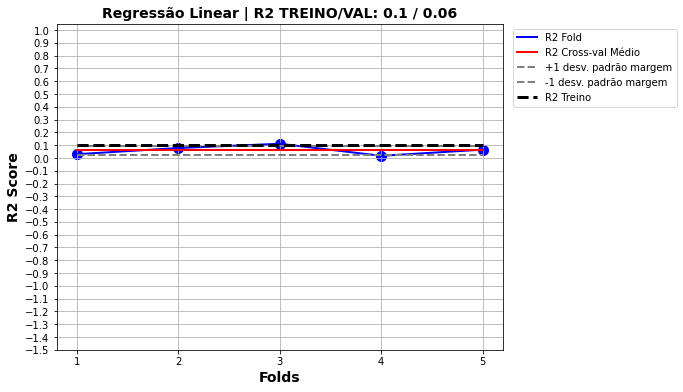

In [113]:
cross_validation_R2_results(modelo = LinearRegression(),
                           nome_modelo = 'Regressão Linear',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

Aplicação da validação cruzada para KNN (K=1):

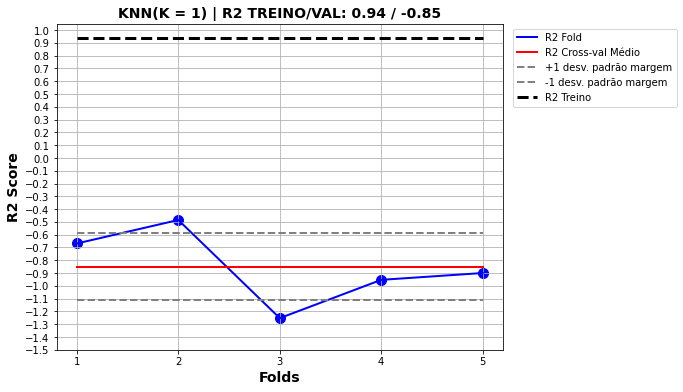

In [114]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 1),
                           nome_modelo = 'KNN(K = 1)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

Aplicação da validação cruzada para KNN (K=10):

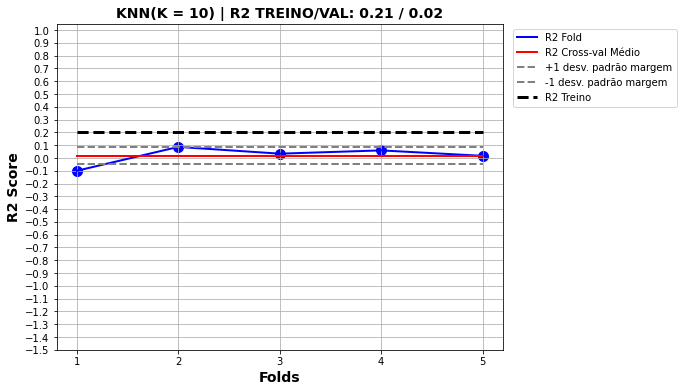

In [115]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 10),
                           nome_modelo = 'KNN(K = 10)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

Aplicação da validação cruzada para KNN (K=15):

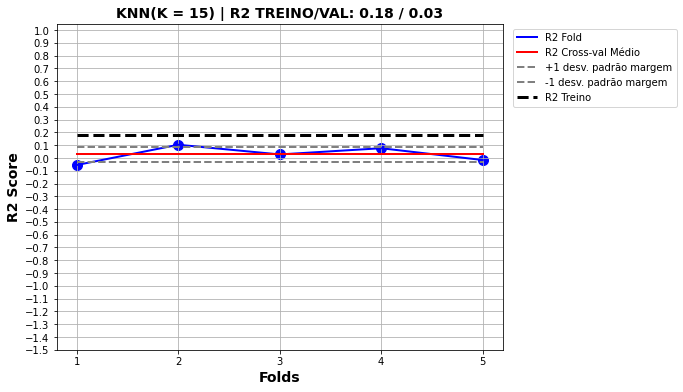

In [116]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 15),
                           nome_modelo = 'KNN(K = 15)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

Aplicação da validação cruzada para DecTree (Max Depth = 5):

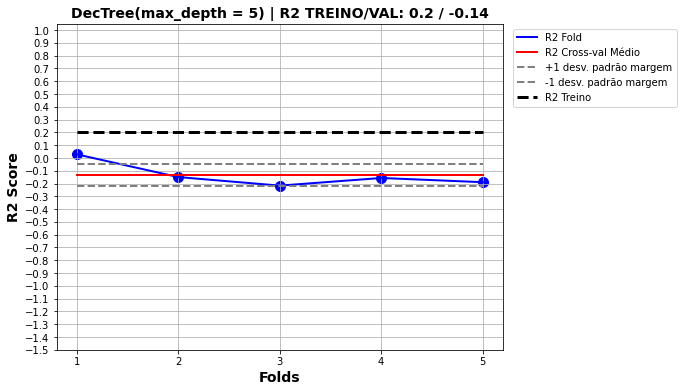

In [121]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 5),
                           nome_modelo = 'DecTree(max_depth = 5)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

Aplicação da validação cruzada para DecTree (Max Depth = 10):

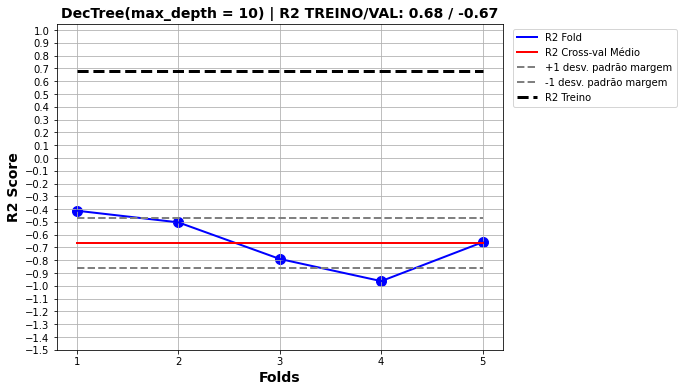

In [118]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 10),
                           nome_modelo = 'DecTree(max_depth = 10)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

Aplicação da validação cruzada para DecTree (Max Depth = 100):

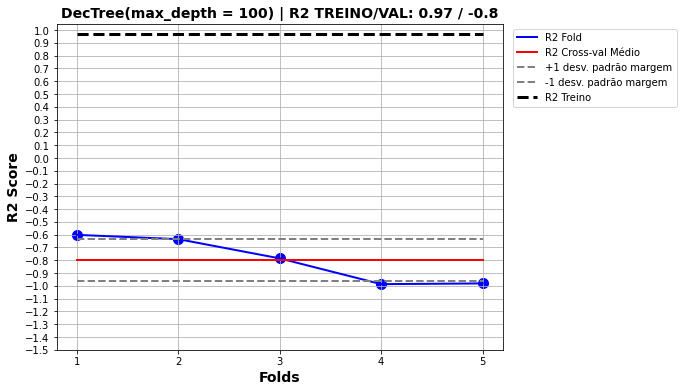

In [119]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 100),
                           nome_modelo = 'DecTree(max_depth = 100)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

Retorno: De acordo com os gráficos plotados do dataframe proposto para prática, não seria possível desenvolver análises preditivas com índices de R2 aceitáveis. A afirmação baseia-se nas análises obtidas, visto que o melhor valor obtido para validação é de 0.06 com o modelo de regressão linear.